# Sistem Rekomendasi Skincare

- Nama: Laila Rohmatul I'zzah
- Email: mc223d5x0763@student.devacademy.id
- ID Dicoding: MC223D5X0763


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Understanding

🔗 Sumber dan Link Download:
Dataset ini tersedia di Kaggle dan dapat diunduh melalui tautan berikut:
https://www.kaggle.com/datasets/hafidahmusthaanah/skincare-review

📁 Nama File: `00. Review.csv`, `00. InfoProduct.csv`

### Data Loading

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/lailarizzah/Submission-Sistem-Rekomendasi/refs/heads/main/data/00.%20InfoProduct.csv'
info_produk = pd.read_csv(url)
info_produk.head()

,Category,Merk,Product,Price,OverallRating,Reviewer
0,Night Cream,Hada Labo,Perfect 3D Gel,Rp. 91.000,3.8,978.0
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,Rp. 27.000,4.2,3851.0
2,Night Cream,Wardah,Lightening Night Cream,Rp. 0,3.5,806.0
3,Face Mist,Avene,Thermal Spring Water,Rp. 199.000,4.4,1239.0
4,Night Cream,Wardah,White Secret Night Cream,Rp. 98.000,3.6,572.0


In [3]:
# load the dataset
url = 'https://raw.githubusercontent.com/lailarizzah/Submission-Sistem-Rekomendasi/refs/heads/main/data/00.%20Review.csv'
review_produk = pd.read_csv(url)
review_produk.head()

,Product,UserName,SkinCond_Age,Recommend,PostDate,Review,Rating
0,Perfect 3D Gel,MALA_,35 - 39,MALA_ recommends this product!,12 Jul 2020,Di aku beneran kerja. Melembabkan bgt. Tp gak ...,5
1,Perfect 3D Gel,Vitamaylinda,"Normal, 19 - 24",Vitamaylinda doesn't recommend this product!,31 May 2020,ga cocok bgttt bikin muka bruntusan dan lgsg m...,2
2,Perfect 3D Gel,aishdwie,"Combination, 19 - 24",aishdwie doesn't recommend this product!,30 Jul 2020,[SOLD]baru pertama kali nyoba dan beli karna l...,2
3,Perfect 3D Gel,ilmisaptiah,"Dry, 30 - 34",ilmisaptiah doesn't recommend this product!,12 Jul 2020,"enak sih di mukaku, yg tadinya kering jd lemba...",3
4,Perfect 3D Gel,alvinadin,"Oily, 19 - 24",alvinadin recommends this product!,15 Jul 2020,"SOLD OUT [PRELOVED] Halo aku preloved ini ya, ...",3


### Exploratory Data Analysis

#### EDA for info_produk

In [4]:
info_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       861 non-null    object 
 1   Merk           861 non-null    object 
 2   Product        861 non-null    object 
 3   Price          856 non-null    object 
 4   OverallRating  861 non-null    float64
 5   Reviewer       858 non-null    float64
dtypes: float64(2), object(4)
memory usage: 40.5+ KB


Dari output terlihat bahwa:

Terdapat 4 kolom dengan tipe object, yaitu: Category, Merk, Product, dan Price. Kolom ini merupakan categorical features (fitur non-numerik). Terdapat 2 kolom numerik dengan tipe data float64 yaitu: OverallRating dan Reviewer. Ini merupakan fitur numerik.

In [5]:
# Mengecek missing values
info_produk.isna().sum()

,0
Category,0
Merk,0
Product,0
Price,5
OverallRating,0
Reviewer,3


Dari output terlihat terdapat data yang berbeda pada *Price* dan *Reviewer* yang mengindikasikan adanya (*missing values*) pada data ini.

In [6]:
# Mengecek data duplikat
print("Jumlah duplikasi: ", info_produk.duplicated().sum())

Jumlah duplikasi:  0


Data ini tidak mengandung data duplikat.

In [7]:
# Mengecek inacurate value
info_produk.describe()

,OverallRating,Reviewer
count,861.000000,858.000000
mean,3.916841,471.864802
std,0.479105,824.006385
min,1.600000,1.000000
25%,3.600000,80.000000
50%,4.000000,229.500000
75%,4.300000,473.000000
max,5.000000,9312.000000


#### EDA for review_produk

In [8]:
review_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       8646 non-null   object
 1   UserName      8646 non-null   object
 2   SkinCond_Age  8569 non-null   object
 3   Recommend     7674 non-null   object
 4   PostDate      8646 non-null   object
 5   Review        8646 non-null   object
 6   Rating        8646 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 473.0+ KB


Dari output terlihat bahwa:

Terdapat 6 kolom dengan tipe object, yaitu: Product, UserName, SkinCond_Age, Recommend, PostDate, Review, dan Rating. Kolom ini merupakan categorical features (fitur non-numerik). Terdapat 1 kolom numerik dengan tipe data float64 yaitu: Rating. Ini merupakan fitur numerik.

In [9]:
# Mengecek missing values
review_produk.isna().sum()

,0
Product,0
UserName,0
SkinCond_Age,77
Recommend,972
PostDate,0
Review,0
Rating,0


Terdapat perbedaan jumlah data pada kolom SkinCond_Age dan Recommend yang mengindikasikan adanya *missing values* pada kedua kolom tersebut.

In [10]:
# Mengecek data duplikat
print("Jumlah duplikasi: ", review_produk.duplicated().sum())

Jumlah duplikasi:  191


Terdapat sebanyak 191 data duplikat.

In [11]:
review_produk.describe()

,Rating
count,8646.000000
mean,3.981032
std,1.083281
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


### Data Distribution

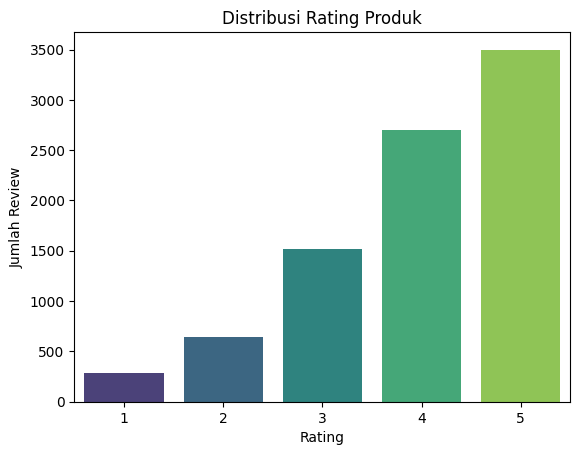

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # Import the warnings module

warnings.filterwarnings("ignore", category=FutureWarning) # Or ignore all FutureWarnings

# Distribusi rating
sns.countplot(x="Rating", data=review_produk, palette="viridis")
plt.title("Distribusi Rating Produk")
plt.xlabel("Rating")
plt.ylabel("Jumlah Review")
plt.savefig("distribusi_rating_produk.png", bbox_inches='tight')  # simpan dulu
plt.show()

Berdasarkan histogram di atas, dapat dilihat bahwa jumlah review tertinggi berasal dari Rating 5.

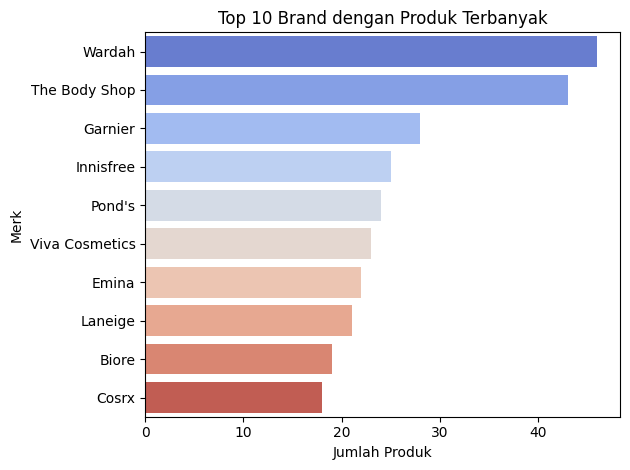

In [13]:
warnings.filterwarnings("ignore", category=FutureWarning) # Or ignore all FutureWarnings

top_merk = info_produk["Merk"].value_counts().head(10)

sns.barplot(x=top_merk.values, y=top_merk.index, palette="coolwarm")
plt.title("Top 10 Brand dengan Produk Terbanyak")
plt.xlabel("Jumlah Produk")
plt.ylabel("Merk")
plt.tight_layout()
plt.savefig("produk_brand_terbanyak.png", bbox_inches='tight')  # simpan dulu
plt.show()


Berdasarkan histogram di atas, produk terbanyak adalah Wardah dengan jumlah lebih dari 40 item. Sedangkan produk paling sedikit adalah Cosrx dengan jumlah kurang dari 20 item.

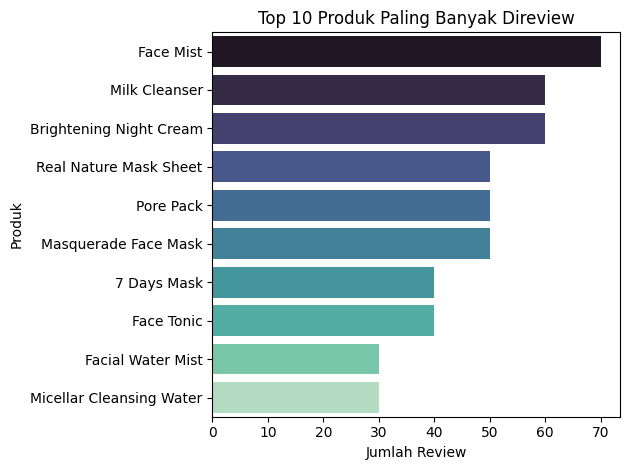

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning) # Or ignore all FutureWarnings

produk_terbanyak = review_produk["Product"].value_counts().head(10)

sns.barplot(x=produk_terbanyak.values, y=produk_terbanyak.index, palette="mako")
plt.title("Top 10 Produk Paling Banyak Direview")
plt.xlabel("Jumlah Review")
plt.ylabel("Produk")
plt.tight_layout()
plt.savefig("produk_review.png", bbox_inches='tight')  # simpan dulu
plt.show()


Berdasarkan histogram di atas, jenis produk dengan review terbanyak adalah FaceMist dengan review mencapai 70. Sedangkan review paling sedikit berasal dari produk Aloe Vera Gel dengan jumlah 30 review.

## Data Preparation

Tahapan yang dilakukan pada data preparation adalah
1. Menghapus Missing Values

  Nilai kosong dihapus dengan dropna() untuk menjaga kebersihan data.

2. Menghapus Duplikasi

  Duplikat dihapus menggunakan drop_duplicates() agar tidak memengaruhi rekomendasi.

3. Standarisasi Fitur Numerik
  
  Kolom numerik seperti Price, OverallRating, dan Reviewer distandarisasi dengan StandardScaler.

4. Preprocessing untuk Content-Based Filtering
  - Fitur Numerik → StandardScaler
  - Fitur Kategorikal → OneHotEncoder (Category, Merk)
  - Fitur Teks → TfidfVectorizer (Product)

  Semua transformasi digabungkan menggunakan ColumnTransformer untuk membuat representasi vektor produk.

5. Preprocessing untuk Collaborative Filtering

  Gunakan kolom: UserName (UserID), Product (ItemID), Rating

  Range rating dihitung, lalu diubah ke format Dataset.load_from_df() dari library surprise untuk digunakan pada model SVD.

In [15]:
import pandas as pd

# Menghapus baris dengan missing values
print("\nShape sebelum menghapus missing values:", info_produk.shape)
info_produk_cleaned = info_produk.dropna().copy() # Menghapus baris dengan NaN dan membuat salinan eksplisit
print("Shape setelah menghapus missing values:", info_produk_cleaned.shape)

# Cek kembali missing values setelah dihapus
print("\nMissing values setelah dihapus:")
print(info_produk_cleaned.isna().sum())

# Gunakan DataFrame yang sudah dibersihkan (info_produk_cleaned) untuk langkah selanjutnya
# Jika variabel yang Anda gunakan di preprocessing selanjutnya adalah 'kosmetik', assign di sini:
kosmetik = info_produk_cleaned

# Pastikan Anda menggunakan variabel 'kosmetik' ini di semua kode preprocessing dan modeling berikutnya


Shape sebelum menghapus missing values: (861, 6)
Shape setelah menghapus missing values: (853, 6)

Missing values setelah dihapus:
Category         0
Merk             0
Product          0
Price            0
OverallRating    0
Reviewer         0
dtype: int64


In [16]:
import pandas as pd
import numpy as np
import re

# Cek missing values sebelum penanganan
print("Missing values sebelum penanganan di review_produk:")
print(review_produk.isna().sum())

# Salin DataFrame asli untuk operasi
review_produk_cleaned = review_produk.copy()

# --- Penanganan 'SkinCond_Age' (Imputasi Modus) ---
# Ini tetap dilakukan seperti sebelumnya
print("\n--- Penanganan 'SkinCond_Age' ---")
if review_produk_cleaned['SkinCond_Age'].isna().sum() > 0:
    mode_skincondage = review_produk_cleaned['SkinCond_Age'].mode()[0]
    review_produk_cleaned['SkinCond_Age'].fillna(mode_skincondage, inplace=True)
    print(f"Imputasi kolom 'SkinCond_Age' dengan modus: '{mode_skincondage}'")
else:
    print("Tidak ada missing values di 'SkinCond_Age'.")


# --- Penanganan dan Feature Engineering untuk 'Recommend' ---
# Kode ini membuat kolom biner Recommends dan Not_Recommends_Info
print("\n--- Penanganan dan Feature Engineering untuk 'Recommend' ---")

# Buat dua kolom biner: Recommends dan Not_Recommends_Info
# Defaultnya False untuk kedua kolom
review_produk_cleaned['Recommends'] = False
review_produk_cleaned['Not_Recommends_Info'] = False

# Identifikasi baris di mana 'Recommend' BUKAN NaN
is_not_nan_recommend = review_produk_cleaned['Recommend'].notna()

# --- Define Patterns ---
# DEFINE POLA TEKS UNTUK "MEREKOMENDASIKAN" DAN "TIDAK MEREKOMENDASIKAN"
recommend_pattern = ' recommends this product!'
# !!! GANTI DENGAN POLA YANG SEBENARNYA JIKA ADA DI DATA ANDA !!!
# Jika tidak ada pola spesifik untuk "tidak merekomendasikan", biarkan string ini kosong atau None
not_recommend_pattern = '' # Contoh: ' does not recommend this product!'

# Set 'Recommends' menjadi True untuk baris yang BUKAN NaN dan mengandung pola rekomendasi
try:
    review_produk_cleaned.loc[is_not_nan_recommend, 'Recommends'] = \
        review_produk_cleaned.loc[is_not_nan_recommend, 'Recommend'].str.contains(recommend_pattern, case=False, na=False)
    print(f"Membuat kolom biner 'Recommends' berdasarkan pola '{recommend_pattern}'.")

    # Set 'Not_Recommends_Info' menjadi True untuk baris yang BUKAN NaN dan mengandung pola TIDAK rekomendasi
    if not not_recommend_pattern: # Jika tidak ada pola negatif yang didefinisikan
         print("Tidak ada pola spesifik untuk 'tidak merekomendasikan' yang didefinisikan. Kolom 'Not_Recommends_Info' akan selalu False.")
    else: # Jika ada pola negatif yang didefinisikan
         review_produk_cleaned.loc[is_not_nan_recommend, 'Not_Recommends_Info'] = \
             review_produk_cleaned.loc[is_not_nan_nan_recommend, 'Recommend'].str.contains(not_recommend_pattern, case=False, na=False)
         print(f"Membuat kolom biner 'Not_Recommends_Info' berdasarkan pola '{not_recommend_pattern}'.")


    # Cek apakah ada baris yang terdeteksi merekomendasikan DAN tidak merekomendasikan
    conflicting_rows = review_produk_cleaned[(review_produk_cleaned['Recommends'] == True) & (review_produk_cleaned['Not_Recommends_Info'] == True)]
    if not conflicting_rows.empty:
        print("PERINGATAN: Ditemukan baris yang terdeteksi sebagai 'merekomendasikan' DAN 'tidak merekomendasikan'.")
        print(conflicting_rows[['Recommend', 'Recommends', 'Not_Recommends_Info']])

    # Jumlah status rekomendasi
    print(f"Jumlah produk yang direkomendasikan (Recommends=True): {review_produk_cleaned['Recommends'].sum()}")
    print(f"Jumlah produk yang tidak direkomendasikan (Not_Recommends_Info=True): {review_produk_cleaned['Not_Recommends_Info'].sum()}")
    # Kasus 'Tidak Ada Info / Teks Lain' adalah ketika Recommends=False DAN Not_Recommends_Info=False DAN kolom asli adalah NaN atau teks lain yang tidak cocok
    no_info_count = len(review_produk_cleaned) - review_produk_cleaned['Recommends'].sum() - review_produk_cleaned['Not_Recommends_Info'].sum()
    print(f"Jumlah produk tanpa info rekomendasi/teks lain yang jelas: {no_info_count}")


except Exception as e:
    print(f"Error saat memproses kolom 'Recommend': {e}")
    print("Pastikan kolom 'Recommend' berisi string dan pola pencarian sudah benar.")


# Anda mungkin ingin menghapus kolom 'Recommend' yang asli setelah mengekstrak informasinya
# review_produk_cleaned = review_produk_cleaned.drop('Recommend', axis=1)


# Cek missing values setelah penanganan
print("\nMissing values setelah penanganan di review_produk_cleaned:")
print(review_produk_cleaned.isna().sum())


print("\nInfo DataFrame setelah penanganan:")
review_produk_cleaned.info()
print("\nSample DataFrame setelah penanganan:")
# Tampilkan kolom Recommend asli dan kolom biner barunya
print(review_produk_cleaned[['Recommend', 'Recommends', 'Not_Recommends_Info']].head())
# Tampilkan juga beberapa baris yang Recommend aslinya NaN untuk verifikasi
print("\nSample rows where original 'Recommend' was NaN:")
print(review_produk_cleaned[review_produk['Recommend'].isna()][['Recommend', 'Recommends', 'Not_Recommends_Info']].head())


# Sekarang, gunakan review_produk_cleaned untuk analisis atau modelling selanjutnya
# review_produk = review_produk_cleaned

Missing values sebelum penanganan di review_produk:
Product           0
UserName          0
SkinCond_Age     77
Recommend       972
PostDate          0
Review            0
Rating            0
dtype: int64

--- Penanganan 'SkinCond_Age' ---
Imputasi kolom 'SkinCond_Age' dengan modus: 'Combination, 19 - 24'

--- Penanganan dan Feature Engineering untuk 'Recommend' ---
Membuat kolom biner 'Recommends' berdasarkan pola ' recommends this product!'.
Tidak ada pola spesifik untuk 'tidak merekomendasikan' yang didefinisikan. Kolom 'Not_Recommends_Info' akan selalu False.
Jumlah produk yang direkomendasikan (Recommends=True): 6173
Jumlah produk yang tidak direkomendasikan (Not_Recommends_Info=True): 0
Jumlah produk tanpa info rekomendasi/teks lain yang jelas: 2473

Missing values setelah penanganan di review_produk_cleaned:
Product                  0
UserName                 0
SkinCond_Age             0
Recommend              972
PostDate                 0
Review                   0
Rating     

#### Mengatasi data duplikat

In [17]:
import pandas as pd


# Hapus data duplikat
review_produk_cleaned_duplicates = review_produk.drop_duplicates(keep='first').copy() # Membuat salinan eksplisit

# Cek jumlah duplikat setelah dihapus
print("Jumlah duplikasi setelah dihapus:", review_produk_cleaned_duplicates.duplicated().sum())
print("Shape setelah menghapus duplikat:", review_produk_cleaned_duplicates.shape)

# Gunakan DataFrame yang sudah bersih dari duplikat ini untuk langkah-langkah selanjutnya
kosmetik = review_produk_cleaned_duplicates
kosmetik.head()

Jumlah duplikasi setelah dihapus: 0
Shape setelah menghapus duplikat: (8455, 7)


,Product,UserName,SkinCond_Age,Recommend,PostDate,Review,Rating
0,Perfect 3D Gel,MALA_,35 - 39,MALA_ recommends this product!,12 Jul 2020,Di aku beneran kerja. Melembabkan bgt. Tp gak ...,5
1,Perfect 3D Gel,Vitamaylinda,"Normal, 19 - 24",Vitamaylinda doesn't recommend this product!,31 May 2020,ga cocok bgttt bikin muka bruntusan dan lgsg m...,2
2,Perfect 3D Gel,aishdwie,"Combination, 19 - 24",aishdwie doesn't recommend this product!,30 Jul 2020,[SOLD]baru pertama kali nyoba dan beli karna l...,2
3,Perfect 3D Gel,ilmisaptiah,"Dry, 30 - 34",ilmisaptiah doesn't recommend this product!,12 Jul 2020,"enak sih di mukaku, yg tadinya kering jd lemba...",3
4,Perfect 3D Gel,alvinadin,"Oily, 19 - 24",alvinadin recommends this product!,15 Jul 2020,"SOLD OUT [PRELOVED] Halo aku preloved ini ya, ...",3


### Standarisasi Fitur Numerik

In [18]:
# Salin dataframe agar tidak mengubah aslinya
kosmetik_info_cleaned = info_produk_cleaned.copy()

# Bersihkan kolom 'Price'
kosmetik_info_cleaned['Price'] = (
    kosmetik_info_cleaned['Price']
    .replace('[Rp.\s]', '', regex=True)  # hapus 'Rp.' dan spasi
    .replace('[.]', '', regex=True)      # hapus titik pemisah ribuan
    .replace(',', '.', regex=True)       # ubah koma ke titik (jika ada)
    .astype(float)
)

### Data Prepocessing

#### a. Content Based Filtering

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

# ====== 1. DEFINISI FITUR ======
numerical_features = ['Price', 'OverallRating', 'Reviewer']
categorical_features = ['Category', 'Merk']
text_features = ['Product']  # Kita perlakukan nama produk sebagai teks

# ====== 2. PREPROCESSOR & PIPELINE ======
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(stop_words='english', max_features=1000), 'Product')
    ],
    remainder='drop'  # Hanya kolom yang disebutkan yang digunakan
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# ====== 3. FIT TRANSFORM ======
kosmetik_processed = pipeline.fit_transform(kosmetik_info_cleaned)

#### b. Collaborative Filtering


In [20]:
!pip install scikit-surprise

In [21]:
!pip install numpy scikit-surprise

In [22]:
# Uninstall both scikit-surprise and numpy
!pip uninstall -y scikit-surprise numpy

# Install a compatible numpy version (surprise requires numpy<2.0)
!pip install "numpy<2.0"

# Install scikit-surprise, which should now use the newly installed numpy version
!pip install scikit-surprise

Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl


In [23]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# 1: Data Loading Menggunakan Data yang sudah bersih
review_data_for_cf = kosmetik.copy()

# Pastikan kolom yang dibutuhkan ada dan memiliki nama yang benar
# Kolom yang dibutuhkan: UserID, ItemID, Rating
required_columns = ['UserName', 'Product', 'Rating']
if not all(col in review_data_for_cf.columns for col in required_columns):
    print("Kolom yang dibutuhkan untuk Collaborative Filtering ('UserName', 'Product', 'Rating') tidak lengkap.")
else:
    print("Kolom yang dibutuhkan untuk Collaborative Filtering tersedia.")
    print(f"Jumlah baris data review bersih: {review_data_for_cf.shape[0]}")
    print(f"Jumlah pengguna unik: {review_data_for_cf['UserName'].nunique()}")
    print(f"Jumlah produk unik: {review_data_for_cf['Product'].nunique()}")

    # 2: Transformasi Data untuk Surprise
    min_rating = review_data_for_cf['Rating'].min()
    max_rating = review_data_for_cf['Rating'].max()
    reader = Reader(rating_scale=(min_rating, max_rating))

    # Format: user_id, item_id, rating
    data = Dataset.load_from_df(review_data_for_cf[['UserName', 'Product', 'Rating']], reader)


Kolom yang dibutuhkan untuk Collaborative Filtering tersedia.
Jumlah baris data review bersih: 8455
Jumlah pengguna unik: 5281
Jumlah produk unik: 802


## Modeling and Result

### 1. Content Based Filtering

Content-Based Filtering (CBF) merupakan sistem rekomendasi yang bergantung pada fitur-fitur dari item itu sendiri dan profil preferensi pengguna.

#### **Keuntungan Content-Based Filtering:**

1. Tidak memerlukan data pengguna lain: Rekomendasi untuk pengguna baru dapat dibuat bahkan jika belum ada data interaksi dari pengguna lain ("cold-start problem" untuk pengguna).
2. Dapat merekomendasikan item baru: Item baru dapat direkomendasikan segera setelah fitur-fiturnya tersedia, bahkan jika belum ada interaksi pengguna dengan item tersebut ("cold-start problem" untuk item).
3. Rekomendasi dapat dijelaskan: Karena berdasarkan fitur item, seringkali lebih mudah menjelaskan mengapa suatu item direkomendasikan (misalnya, "Anda direkomendasikan serum ini karena Anda menyukai serum sebelumnya dan keduanya mengandung Vitamin C").

#### **Kekurangan Content-Based Filtering:**

1. Ketergantungan pada kualitas representasi item: Kualitas rekomendasi sangat bergantung pada seberapa baik fitur-fitur item menangkap karakteristik pentingnya. Jika fitur item terbatas (seperti hanya nama produk dan kategori), rekomendasinya mungkin kurang relevan.
2. Tidak merekomendasikan item di luar "gelembung" preferensi pengguna: Sistem CBF cenderung merekomendasikan item yang sangat mirip dengan apa yang sudah disukai pengguna, sehingga sulit untuk menemukan item baru yang mungkin disukai tetapi sangat berbeda dari yang sebelumnya. Ini disebut masalah "over-specialization".
3. Membutuhkan data fitur item yang kaya: Jika hanya sedikit informasi tentang item yang tersedia, sulit untuk membuat representasi item yang meaningful.

In [24]:
import random

# Set seed untuk hasil yang konsisten
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ====== 1. COSINE SIMILARITY ======
cosine_sim = cosine_similarity(kosmetik_processed)

# Buat DataFrame similarity
product_names = kosmetik_info_cleaned['Product'].tolist()
cosine_df = pd.DataFrame(cosine_sim, index=product_names, columns=product_names)

# ====== 2. FUNGSI REKOMENDASI ======
def recommend_products(product_name, data_cleaned, processed_matrix, top_n=5):
    """
    Memberikan rekomendasi produk serupa menggunakan Content-Based Filtering.

    Args:
        product_name (str): Nama produk yang ingin dicari rekomendasinya.
        data_cleaned (pd.DataFrame): DataFrame informasi produk yang sudah dibersihkan.
        processed_matrix (sparse matrix): Matrix fitur produk yang sudah diproses.
        top_n (int): Jumlah rekomendasi yang diinginkan.

    Returns:
        pd.DataFrame: DataFrame yang berisi rekomendasi produk, atau None jika produk tidak ditemukan.
    """
    # Cari baris produk berdasarkan nama di data_cleaned
    product_row = data_cleaned[data_cleaned['Product'] == product_name]

    if product_row.empty:
        print(f"Produk '{product_name}' tidak ditemukan.")
        return None

    # Ambil index POSISIONAL dari produk dalam data_cleaned
    # Ini akan sesuai dengan index di processed_matrix
    idx = product_row.index[0] # Ambil index asli dari dataframe bersih
    # Dapatkan posisi integer (iloc) yang sesuai dengan index asli tersebut
    # Contoh: jika index asli 5 dan 853 dihapus, index asli 6 sekarang ada di posisi 1 (iloc 1)
    positional_idx = data_cleaned.index.get_loc(idx)


    # Hitung skor similarity antara produk ini dan semua produk lain di matrix
    sim_scores = cosine_similarity(processed_matrix[positional_idx], processed_matrix).flatten()

    # Ambil indeks top_n + 1 karena produk itu sendiri akan jadi skor 1.0
    # Gunakan argsort untuk mendapatkan index yang akan mengurutkan array, lalu ambil top N+1
    # [::-1] untuk membalik urutan (dari terbesar ke terkecil)
    sim_indices_sorted = sim_scores.argsort()[-top_n-1:][::-1]

    # Buang index produk itu sendiri dari rekomendasi
    # Kita perlu mencari posisi produk itu sendiri di dalam sim_indices_sorted
    # Cari index di data_cleaned yang sesuai dengan positional_idx
    # Kemudian cari index tersebut di dalam sim_indices_sorted
    product_self_index_in_sorted = None
    for i, original_idx_in_cleaned in enumerate(sim_indices_sorted):
         # Ambil index asli di data_cleaned berdasarkan index posisi di processed_matrix
         actual_original_idx = data_cleaned.iloc[original_idx_in_cleaned].name
         if actual_original_idx == idx:
             product_self_index_in_sorted = i
             break

    if product_self_index_in_sorted is not None:
         sim_indices_top = [sim_indices_sorted[i] for i in range(len(sim_indices_sorted)) if i != product_self_index_in_sorted][:top_n]
    else:
         # Kasus fallback jika produk sendiri tidak ditemukan di top_n+1 (sangat tidak mungkin)
         sim_indices_top = sim_indices_sorted[1:top_n+1]


    # Ambil hasil menggunakan positional indices
    hasil = data_cleaned.iloc[sim_indices_top][['Product', 'Category', 'Merk']].copy() # Gunakan .copy() untuk menghindari SettingWithCopyWarning
    hasil['Similarity Score'] = sim_scores[sim_indices_top]

    return hasil.reset_index(drop=True)


# Cek rekomendasi untuk beberapa produk sebagai evaluasi kualitatif
sample_products = [
    "Miraculous Refining Serum",
    "Whitening Face Mask"
]

print("====== Rekomendasi Kualitatif Content-Based Filtering ======")
for product in sample_products:
    print(f"\nRekomendasi untuk: {product}")
    # Panggil fungsi dengan data_cleaned dan processed_matrix
    rekomendasi = recommend_products(product, kosmetik_info_cleaned, kosmetik_processed, top_n=5)
    if rekomendasi is not None:
        print(rekomendasi)
    else:
        print("Produk tidak ditemukan.")


# ====== 3. EVALUASI AUTOMATIS CONTENT-BASED FILTERING (Precision@K) ======

def precision_at_k_cbf(data_cleaned, processed_matrix, k=5):
    """
    Menghitung Precision@K untuk Content-Based Filtering.

    Args:
        data_cleaned (pd.DataFrame): DataFrame informasi produk yang sudah dibersihkan.
        processed_matrix (sparse matrix): Matrix fitur produk yang sudah diproses.
        k (int): Parameter K untuk Precision@K.

    Returns:
        float: Rata-rata Precision@K.
    """
    total_precision = 0
    valid_cases = 0

    # Iterate using iloc to get positional index (0, 1, 2, ...)
    for positional_idx in range(len(data_cleaned)):
        # Get the original row from the cleaned data using positional index
        row = data_cleaned.iloc[positional_idx]
        product = row["Product"]
        kategori_asli = row["Category"]

        # Dapatkan rekomendasi menggunakan fungsi yang sudah dimodifikasi
        rekomendasi = recommend_products(product, data_cleaned, processed_matrix, top_n=k)

        # Skip if no recommendations or product not found
        if rekomendasi is None or rekomendasi.empty:
            continue

        # Hitung berapa banyak rekomendasi yang memiliki kategori yang sama
        relevan = rekomendasi["Category"] == kategori_asli
        precision = relevan.sum() / k

        total_precision += precision
        valid_cases += 1

    avg_precision = total_precision / valid_cases if valid_cases > 0 else 0
    print(f"\n📌 Evaluasi Content-Based Filtering — Precision@{k}: {avg_precision:.4f}")
    return avg_precision

# ====== 4. Jalankan Evaluasi ======
# Panggil fungsi evaluasi dengan data_cleaned dan processed_matrix
precision_at_k_cbf(kosmetik_info_cleaned, kosmetik_processed, k=5)

====== Rekomendasi Kualitatif Content-Based Filtering ======

Rekomendasi untuk: Miraculous Refining Serum
                               Product         Category               Merk  \
0            Miraculous Refining Toner            Toner            AVOSKIN   
1  Perfect Hydrating Treatment Essence  Serum & Essence            AVOSKIN   
2           Sakura White Booster Serum  Serum & Essence            Garnier   
3             C White Lightening Serum  Serum & Essence  Azarine Cosmetics   
4               Brightening Face Serum  Serum & Essence           Whitelab   

   Similarity Score  
0          0.662910  
1          0.626814  
2          0.545330  
3          0.534822  
4          0.527533  

Rekomendasi untuk: Whitening Face Mask
                                  Product   Category            Merk  \
0  Peel Off Charcoal Black Head Nose Pack  Nose Pack          Vienna   
1                      Blackheads Remover  Nose Pack          Vienna   
2                     Blackhead Nose

0.7955451348182884

#### **Cara Kerja Content Based Filtering**

1. Membuat Representasi Item (Fitur Item): Ini adalah langkah pertama dan paling penting.  Perlu didefinisikan apa saja "konten" atau fitur yang menggambarkan setiap produk skincare. Berdasarkan data info_produk.csv Anda, fitur yang relevan meliputi:

  - Category: (e.g., Serum, Moisturizer, Cleanser)
  - Merk: (e.g., Wardah, Emina, Scarlett)
  - Product Name: Nama produk itu sendiri (kata-kata dalam nama bisa menjadi fitur).
  - Ingredients (Jika ada): Daftar bahan-bahan dalam produk adalah fitur konten yang sangat kuat (sayangnya, ini tidak ada di info_produk.csv yang Anda gunakan, tetapi idealnya ini akan disertakan).
  - Price: Harga (meskipun numerik, ini adalah atribut item).
  - OverallRating: Rating rata-rata (juga atribut item).
  - Reviewer: Jumlah reviewer (atribut item).

Untuk menggunakan fitur-fitur ini dalam model, perlu mengubahnya menjadi format numerik yang sudah dilakukan pada tahap Data Preparation.


2. Membuat Profil Pengguna

  Ada beberapa cara untuk membuat profil preferensi pengguna:

  - Berdasarkan Item yang Disukai: Profil pengguna dibuat dengan menggabungkan (misalnya, merata-ratakan) vektor fitur dari semua item yang disukai pengguna tersebut (berdasarkan rating tinggi, pembelian, dll.).
  - Berdasarkan Interaksi: Profil bisa berupa representasi item terakhir yang diinteraksi, atau kombinasi dari item yang paling sering atau paling lama diinteraksi.
  - Explicit Feedback: Menggunakan rating eksplisit atau label suka/tidak suka dari pengguna.
  - Implicit Feedback: Menggunakan tindakan pengguna seperti melihat produk, mengklik, menambah ke keranjang, dll.

  Dalam sistem rekomendasi ini, pendekatan yang digunakan sedikit berbeda dan lebih mirip dengan mencari "item serupa" secara langsung berdasarkan fitur item, tanpa membangun profil pengguna eksplisit terlebih dahulu. Ketika memanggil `recommend_products("Nama Produk")`, fungsi tersebut:

    - Mengambil vektor fitur dari produk yang menjadi input (kosmetik_processed[idx]).
    - Menghitung kemiripan (menggunakan Cosine Similarity) antara vektor fitur produk input tersebut dan vektor fitur dari semua produk lain dalam dataset (cosine_similarity(kosmetik_processed[idx], kosmetik_processed)).
    - Mengurutkan produk berdasarkan skor kemiripan dan merekomendasikan produk dengan skor kemiripan tertinggi (selain produk itu sendiri).
    - Menghasilkan Rekomendasi: Setelah memiliki representasi item dan profil pengguna, sistem dapat merekomendasikan item baru kepada pengguna:
    - Bandingkan profil pengguna dengan vektor fitur semua item yang belum pernah diinteraksi pengguna.

3. Rekomendasikan item yang paling "mirip" dengan profil pengguna.

  Dalam sistem ini, rekomendasi dihasilkan dengan menemukan item lain yang memiliki vektor fitur yang sangat mirip dengan item yang menjadi input pengguna. Ini bisa dianggap sebagai sub-tipe CBF yang fokus pada "item-to-item similarity" berdasarkan konten/fitur item. Ini berguna ketika pengguna memilih satu item dan ingin menemukan item lain yang serupa dengannya.

### 2. Collaborative Filtering

Collaborative Filtering (CF) membuat rekomendasi berdasarkan perilaku pengguna lain yang serupa atau kemiripan antar item berdasarkan cara pengguna berinteraksi dengannya.

In [25]:
import pandas as pd
import numpy as np
import random
import warnings  # Untuk mengelola warning
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Ignore specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Set seed untuk hasil yang konsisten
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# --- Model Collaborative Filtering (SVD) ---
algo = SVD(random_state=SEED)

print("\nMelakukan cross-validation untuk model SVD...")
cross_val_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("\nHasil Cross-Validation (RMSE & MAE):")
print(cross_val_results)

# Latih model pada seluruh dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

print("\nModel SVD selesai dilatih pada seluruh dataset.")

# --- Sistem Rekomendasi ---

def get_collaborative_recommendations(user_id, n_recommendations=10, watched_items=None):
    """
    Memberikan rekomendasi item untuk pengguna tertentu menggunakan model Collaborative Filtering.
    """
    if watched_items is None:
        user_ratings = review_data_for_cf[review_data_for_cf['UserName'] == user_id]
        watched_items = user_ratings['Product'].tolist()

    all_items = review_data_for_cf['Product'].unique()
    items_to_predict = [item for item in all_items if item not in watched_items]

    predictions = []
    for item_id in items_to_predict:
        pred = algo.predict(user_id, item_id)
        predictions.append((item_id, pred.est))

    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n_recommendations]

# --- Contoh Penggunaan ---
if not review_data_for_cf.empty:
    example_user_id = review_data_for_cf['UserName'].iloc[0]
    print(f"\nMemberikan rekomendasi Collaborative Filtering untuk pengguna: '{example_user_id}'")

    user_watched_items = review_data_for_cf[review_data_for_cf['UserName'] == example_user_id]['Product'].tolist()
    print(f"Produk yang sudah dinilai pengguna '{example_user_id}': {user_watched_items[:5]}...")

    recommendations = get_collaborative_recommendations(
        example_user_id,
        n_recommendations=10,
        watched_items=user_watched_items
    )

    print(f"\nTop 10 Rekomendasi Produk (Collaborative Filtering) untuk pengguna '{example_user_id}':")
    if recommendations:
        for item, rating in recommendations:
            print(f"- {item} (Prediksi Rating: {rating:.2f})")
    else:
        print("Tidak ada rekomendasi yang ditemukan (mungkin semua produk sudah dinilai?).")
else:
    print("DataFrame review_data_for_cf kosong. Tidak bisa menjalankan contoh rekomendasi.")



Melakukan cross-validation untuk model SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0159  1.0118  1.0221  1.0391  1.0224  1.0222  0.0093  
MAE (testset)     0.8221  0.8086  0.8148  0.8308  0.8132  0.8179  0.0078  
Fit time          0.10    0.10    0.11    0.12    0.10    0.11    0.01    
Test time         0.01    0.01    0.02    0.01    0.01    0.01    0.00    

Hasil Cross-Validation (RMSE & MAE):
{'test_rmse': array([1.01586531, 1.01177896, 1.02209094, 1.0391461 , 1.02235755]), 'test_mae': array([0.82208617, 0.80857497, 0.81483838, 0.83084205, 0.81316491]), 'fit_time': (0.0981743335723877, 0.10244584083557129, 0.10946512222290039, 0.1154332160949707, 0.10156583786010742), 'test_time': (0.007468461990356445, 0.008064031600952148, 0.01616525650024414, 0.006856679916381836, 0.0068013668060302734)}

Model SVD selesai dilatih pada seluruh dataset.

Memberikan rekomendasi Collabo

Model SVD (Singular Value Decomposition) yang  diimplementasikan dengan scikit-surprise adalah bentuk dari Model-Based Collaborative Filtering, khususnya Matrix Factorization.

#### **Cara Kerja Model SVD**
1. Model mencoba "mengurai" matriks rating pengguna-item menjadi dua matriks yang lebih kecil, yaitu satu matriks pengguna-faktor dan satu matriks item-faktor.
2. Setiap baris di matriks pengguna-faktor merepresentasikan preferensi pengguna dalam bentuk angka di berbagai "faktor" atau "fitur" laten.
3. Setiap kolom di matriks item-faktor merepresentasikan sejauh mana item memiliki fitur-fitur laten tersebut.
4. Rating yang diprediksi untuk pasangan pengguna-item dihitung dengan mengalikan (dot product) vektor laten pengguna dan vektor laten item yang sesuai. Model dilatih untuk meminimalkan error antara rating yang diprediksi dan rating asli.

#### **Cara Kerja Sistem Rekomendasi**
Setelah model dilatih, untuk merekomendasikan item kepada pengguna target, model menghitung prediksi rating pengguna tersebut untuk semua item yang belum pernah mereka interaksi menggunakan vektor laten pengguna dan vektor laten setiap item. Item dengan prediksi rating tertinggi kemudian direkomendasikan.


Model SVD (Matrix Factorization) ini menggabungkan aspek dari User-Based dan Item-Based CF secara implisit melalui faktor-faktor laten. Ini seringkali memberikan kinerja yang lebih baik dan lebih skalabel daripada metode User/Item-Based murni untuk dataset yang besar dan jarang (sparse).

In [26]:
%%writefile requirements.txt
pandas>=1.3.0
numpy>=1.21.0
scikit-learn>=1.0
scikit-surprise>=1.1.1
matplotlib>=3.4.0
seaborn>=0.11.0

Overwriting requirements.txt
